<b>Imports</b>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Data import and overview</b>

In [83]:
data = pd.read_excel('homicidios_dolosos_consumados.xlsx', sheet_name='Datos')
df = pd.DataFrame(data)

In [84]:
df.head()

,ID_VICTIMA,FECHA,AÑO,MES,TRIMESTRE,DIA_SEMANA,HORA,DEPARTAMENTO,JURISDICCION,LUGAR,...,ARMAREC,PROCESADOS,MENORESCINICIOPROC,ACLARADO,SEXO,EDADCALC,NACIONALIDAD,ANTECEDENTES,ANTECEDENTESPORESTUPEFACIENTES,REL_VICT_AGRES
0,AAA1134816,30.04.2021,2021.0,ABRIL,SEGUNDO TRIMESTRE,VIERNES,8,CANELONES,SECCIONAL 28,VIA PUBLICA U OTROS ESPACIOS ABIERTOS,...,ARMA DE FUEGO,SIN PROCESADOS,SIN MENORES C/INICIO PROC.,SIN ACLARAR,HOMBRE,39,URUGUAYA,ANTECEDENTES POR DELITOS NO VIOLENTOS,SIN ANTECEDENTES,VINCULO DESCONOCIDO
1,AAA1146478,30.04.2021,2021.0,ABRIL,SEGUNDO TRIMESTRE,VIERNES,13,MONTEVIDEO,SECCIONAL 24,VIA PUBLICA U OTROS ESPACIOS ABIERTOS,...,ARMA DE FUEGO,SIN PROCESADOS,SIN MENORES C/INICIO PROC.,SIN ACLARAR,HOMBRE,33,URUGUAYA,ANTECEDENTES POR AMBOS TIPOS DE DELITOS,SIN ANTECEDENTES,VINCULO DESCONOCIDO
2,AAA128234,28.04.2021,2021.0,ABRIL,SEGUNDO TRIMESTRE,MIERCOLES,22,MONTEVIDEO,SECCIONAL 14,VIA PUBLICA U OTROS ESPACIOS ABIERTOS,...,ARMA DE FUEGO,SIN PROCESADOS,SIN MENORES C/INICIO PROC.,SIN ACLARAR,HOMBRE,31,URUGUAYA,ANTECEDENTES POR DELITOS VIOLENTOS,SIN ANTECEDENTES,VINCULO DESCONOCIDO
3,AAA199424,28.04.2021,2021.0,ABRIL,SEGUNDO TRIMESTRE,MIERCOLES,20,TACUAREMBO,SECCIONAL 2,RESIDENCIA,...,CORTO / PUNZANTE,AUTOR MAYOR FALLECIDO,SIN MENORES C/INICIO PROC.,ACLARADO,MUJER,60,URUGUAYA,SIN ANTECEDENTES,SIN ANTECEDENTES,PAREJA/EX PAREJA
4,AAB1152814,16.04.2021,2021.0,ABRIL,SEGUNDO TRIMESTRE,VIERNES,18,MONTEVIDEO,SECCIONAL 15,VIA PUBLICA U OTROS ESPACIOS ABIERTOS,...,ARMA DE FUEGO,SIN PROCESADOS,SIN MENORES C/INICIO PROC.,SIN ACLARAR,HOMBRE,28,URUGUAYA,ANTECEDENTES POR DELITOS VIOLENTOS,SIN ANTECEDENTES,VINCULO DESCONOCIDO


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_VICTIMA                      3780 non-null   object 
 1   FECHA                           3780 non-null   object 
 2   AÑO                             3780 non-null   float64
 3   MES                             3780 non-null   object 
 4   TRIMESTRE                       3780 non-null   object 
 5   DIA_SEMANA                      3780 non-null   object 
 6   HORA                            3780 non-null   object 
 7   DEPARTAMENTO                    3780 non-null   object 
 8   JURISDICCION                    3780 non-null   object 
 9   LUGAR                           3780 non-null   object 
 10  MOTIVO_APARENTE                 3780 non-null   object 
 11  TIPO                            3780 non-null   object 
 12  ARMAREC                         37

<b>Taking care of nulls</b>

In [173]:
df['HORA'].value_counts()
hora_mode = df['HORA'].mode()
df['HORA'] = df['HORA'].replace('SIN DATO', hora_mode[0])

In [8]:
#df['JURISDICCION'].unique()
#df['JURISDICCION'].value_counts()
# 9 nulls out of 3780 --> 0.08%
# Replace by the mode of each department

In [86]:
def replace_jurisdiction(df):
    mode_by_department = df.groupby('DEPARTAMENTO')['JURISDICCION'].agg(pd.Series.mode)

    def map_jurisdiction(row):
        if row['JURISDICCION'] == 'SIN DATO':
            return mode_by_department[row['DEPARTAMENTO']]
        else:
            return row['JURISDICCION']


    df['JURISDICCION'] = df.apply(map_jurisdiction, axis=1)

    return df

df = replace_jurisdiction(df)

In [80]:
#df['LUGAR'].unique()
#df['LUGAR'].value_counts()
# 656 nulls out of 3780 --> 17.35%
# Change the name to OTROS

In [87]:
df['LUGAR'] = df['LUGAR'].replace('OTROS/SIN DATO', 'OTROS')

In [13]:
#df['MOTIVO_APARENTE'].unique()
#df['MOTIVO_APARENTE'].value_counts()
# 426 nulls out of 3780 --> 11.26%
# Replace by the mode

In [88]:
motivo_aparente_mode = df['MOTIVO_APARENTE'].mode()
#motivo_aparente_mode[0]
df['MOTIVO_APARENTE'] = df['MOTIVO_APARENTE'].replace('SIN DATO/ DESCONOCIDO', motivo_aparente_mode[0])

In [27]:
#df['TIPO'].unique()
#df['TIPO'].value_counts()
# 3201 nulls out of 3780 --> 84.68% of data 'NO CORRESPONDE', it means its not relevant
# Drop the column

In [89]:
df = df.drop('TIPO', axis=1)

In [23]:
#df['ARMAREC'].unique()
#df['ARMAREC'].value_counts()
# 130 nulls out of 3780 --> 3.43%
# Replace by the mode

In [90]:
armarec_mode = df['ARMAREC'].mode()
#armarec_mode[0]
df['ARMAREC'] = df['ARMAREC'].replace('SIN DATO', armarec_mode[0])

In [26]:
#df['SEXO'].unique()
#df['SEXO'].value_counts()
# 11 nulls out of 3780 --> 0.29%
# Replace by the mode

In [91]:
sexo_mode = df['SEXO'].mode()
#sexo_mode[0]
df['SEXO'] = df['SEXO'].replace('SIN DATO', sexo_mode[0])

In [31]:
#df['EDADCALC'].unique()
#df[df['EDADCALC'] == 'SIN DATO'].count()
#df['EDADCALC'].value_counts()
# 37 nulls out of 3780 --> 0.97%
# Replace by the mean

In [92]:
edadcalc_mean = df[df['EDADCALC'] != 'SIN DATO']['EDADCALC'].astype(int).mean()
#edadcalc_mean
df['EDADCALC'] = df['EDADCALC'].replace('SIN DATO', edadcalc_mean)

In [33]:
#df['NACIONALIDAD'].unique()
#df['NACIONALIDAD'].value_counts()
# 1380 nulls out of 3780 --> 36.5%
# 2364 --> 62.53%
# Replace by the mode or drop the column

In [93]:
df = df.drop('NACIONALIDAD', axis=1)

In [38]:
#df['ANTECEDENTES'].unique()
#df['ANTECEDENTES'].value_counts()
# 58 nulls out of 3780 --> 1.53%
# Replace by the mode 

In [94]:
antecedente_mode = df['ANTECEDENTES'].mode()
#antecedente_mode[0]
df['ANTECEDENTES'] = df['ANTECEDENTES'].replace('SIN DATO', antecedente_mode[0])

In [42]:
#df['ANTECEDENTESPORESTUPEFACIENTES'].unique()
#df['ANTECEDENTESPORESTUPEFACIENTES'].value_counts()
# 66 nulls out of 3780 --> 1.74%
# Replace by the mode 

In [95]:
antecedentepe_mode = df['ANTECEDENTESPORESTUPEFACIENTES'].mode()
#antecedentepe_mode[0]
df['ANTECEDENTESPORESTUPEFACIENTES'] = df['ANTECEDENTESPORESTUPEFACIENTES'].replace('SIN DATO', antecedentepe_mode[0])
df['ANTECEDENTESPORESTUPEFACIENTES'] = df['ANTECEDENTESPORESTUPEFACIENTES'].replace('2', antecedentepe_mode[0])

In [12]:
#df['REL_VICT_AGRES'].unique()
#df['REL_VICT_AGRES'].value_counts()
# 1592 nulls out of 3780 --> 42.11%
# Drop the column, leave it like it is or divide according to the percentages

In [96]:
proporciones = df[df['REL_VICT_AGRES'] != 'VINCULO DESCONOCIDO']
proporciones = proporciones['REL_VICT_AGRES'].value_counts(normalize=True)
proporciones

AMIGO/CONOCIDO      0.555759
SIN RELACION        0.206124
PAREJA/EX PAREJA    0.123857
FAMILIAR            0.114260
Name: REL_VICT_AGRES, dtype: float64

In [97]:
def reasignar_ponderado(row):
    if row['REL_VICT_AGRES'] == 'VINCULO DESCONOCIDO':
        return np.random.choice(proporciones.index, p=proporciones.values)
    else:
        return row['REL_VICT_AGRES']

df['REL_VICT_AGRES'] = df.apply(reasignar_ponderado, axis=1)

In [98]:
df['REL_VICT_AGRES'].value_counts(normalize=True)

AMIGO/CONOCIDO      0.558730
SIN RELACION        0.199735
PAREJA/EX PAREJA    0.124074
FAMILIAR            0.117460
Name: REL_VICT_AGRES, dtype: float64

<b>Maping variables to number</b>

In [99]:
mapping = {'ENERO': '1', 'FEBRERO': '2', 'MARZO': '3', 'ABRIL': '4', 'MAYO': '5', 'JUNIO': '6', 'JULIO': '7', 'AGOSTO': '8', 'SEPTIEMBRE': '9', 'OCTUBRE': '10', 'NOVIEMBRE': '11', 'DICIEMBRE': '12'}
df['MES_NUMERO'] = df['MES'].map(mapping)
df = df.drop('MES', axis=1)
#df

In [100]:
mapping = {'PRIMER TRIMESTRE': '1', 'SEGUNDO TRIMESTRE': '2', 'TERCER TRIMESTRE': '3', 'CUARTO TRIMESTRE': '4'}
df['TRIMESTRE_NUMERO'] = df['TRIMESTRE'].map(mapping)
df = df.drop('TRIMESTRE', axis=1)
#df

In [101]:
mapping = {'LUNES': '1', 'MARTES': '2', 'MIERCOLES': '3', 'JUEVES': '4', 'VIERNES': '5', 'SABADO': '6', 'DOMINGO': '7'}
df['DIA_SEMANA_NUMERO'] = df['DIA_SEMANA'].map(mapping)
#df = df.drop('DIA_SEMANA', axis=1)
#df

In [102]:
df['RANGO_EDAD'] = df['EDADCALC'].astype(int) // 5 * 5

In [62]:
#df[['RANGO_EDAD', 'EDADCALC']]

In [103]:
df['RANGO_EDAD'] = df['RANGO_EDAD'].astype(str) + ' - ' + (df['RANGO_EDAD'] + 5).astype(str)

In [63]:
#df[['RANGO_EDAD', 'EDADCALC']]

<b>Data overview graphically</b>

In [104]:
homicides_by_year = df.groupby('AÑO').size()

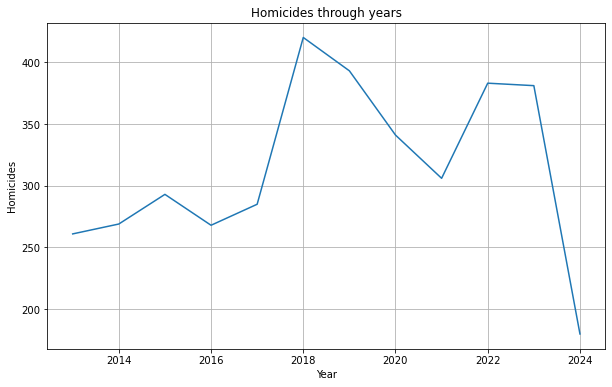

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(homicides_by_year.index, homicides_by_year.values)
plt.xlabel('Year')
plt.ylabel('Homicides')
plt.title('Homicides through years')
plt.grid(True)
plt.show()

In [106]:
df[df["AÑO"] == 2024]['MES_NUMERO'].astype(int).max()

6

In [141]:
df_sin_2024 = df[df['AÑO'] != 2024]
cantidad_por_trimestre_año = df_sin_2024.groupby(['TRIMESTRE_NUMERO', 'AÑO']).size().reset_index(name='cantidad')
promedio_trimestre = cantidad_por_trimestre_año.groupby('TRIMESTRE_NUMERO')['cantidad'].mean().reset_index()

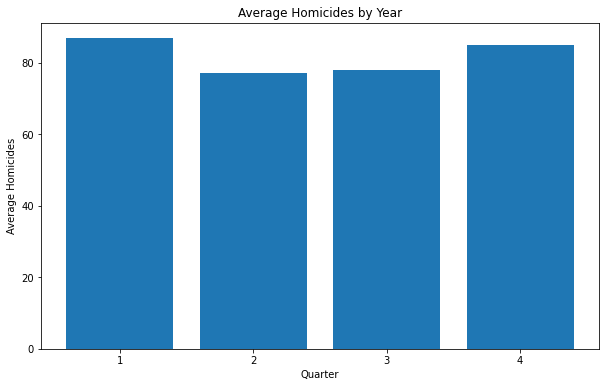

In [142]:
plt.figure(figsize=(10, 6))
plt.bar(promedio_trimestre['TRIMESTRE_NUMERO'], promedio_trimestre['cantidad'])
plt.xlabel('Quarter')
plt.ylabel('Average Homicides')
plt.title('Average Homicides by Year')
plt.xticks(promedio_trimestre['TRIMESTRE_NUMERO'])
plt.show()

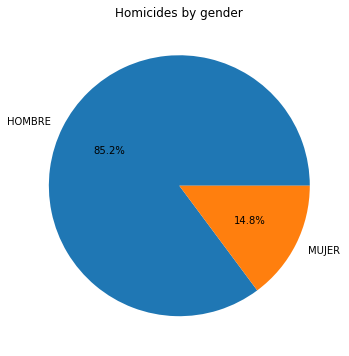

In [169]:
conteo_por_genero = df['SEXO'].value_counts()
#conteo_por_genero

plt.figure(figsize=(10, 6))
plt.pie(conteo_por_genero, labels=conteo_por_genero.index, autopct='%1.1f%%')

plt.title('Homicides by gender')

plt.show()

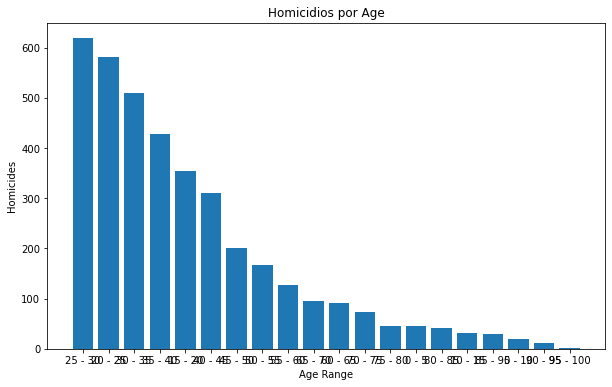

In [170]:
conteo_por_edades = df['RANGO_EDAD'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(conteo_por_edades.index, conteo_por_edades.values)

# Personalizar el gráfico
plt.xlabel('Age Range')
plt.ylabel('Homicides')
plt.title('Homicidios por Age')

plt.show()

In [182]:
df.to_csv('homicides.csv')